# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [3]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [4]:
#指定測試集與訓練資料集 
#把圖片拉成向量了 做ＤＮＮ
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [5]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [6]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [7]:
from keras.models import Sequential
from keras.layers import Dense

In [16]:
#建立模型
model = Sequential()
# input fully connected layer:
model.add(Dense(units=256, input_dim = 784, kernel_initializer='normal', activation='relu'))
# output layer(probability vector(softmax) dim = 10):
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [17]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [18]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4613 - accuracy: 0.8712 - val_loss: 0.1325 - val_accuracy: 0.9612
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1166 - accuracy: 0.9657 - val_loss: 0.1035 - val_accuracy: 0.9687
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0726 - accuracy: 0.9785 - val_loss: 0.0922 - val_accuracy: 0.9715
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0484 - accuracy: 0.9850 - val_loss: 0.0865 - val_accuracy: 0.9735
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0356 - accuracy: 0.9891 - val_loss: 0.0874 - val_accuracy: 0.9743
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0266 - accuracy: 0.9924 - val_loss: 0.0781 - val_accuracy: 0.9775
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0193 - accuracy: 0.9944 - val_loss: 0.0894 - val_accuracy:

In [19]:
print('Testing accuracy:', model.evaluate(x_Test_normalize, y_Test_OneHot)[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0709 - accuracy: 0.9809
Testing accuracy: 0.98089998960495


### [練習]請嘗試新增一層或兩層看看最後預測結果是否有差異 

In [20]:
model = Sequential()
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history = model.fit(x=x_Train_normalize, y=y_Train_OneHot,
                          validation_split = 0.2, epochs = 10, batch_size = 32, verbose = 1)

Epoch 1/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4280 - accuracy: 0.8681 - val_loss: 0.1152 - val_accuracy: 0.9668
Epoch 2/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1003 - accuracy: 0.9688 - val_loss: 0.0900 - val_accuracy: 0.9731
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0681 - accuracy: 0.9785 - val_loss: 0.0939 - val_accuracy: 0.9720
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0465 - accuracy: 0.9847 - val_loss: 0.0973 - val_accuracy: 0.9710
Epoch 5/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0394 - accuracy: 0.9879 - val_loss: 0.0921 - val_accuracy: 0.9743
Epoch 6/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0340 - accuracy: 0.9895 - val_loss: 0.1058 - val_accuracy: 0.9747
Epoch 7/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0257 - accuracy: 0.9916 - val_loss: 0.1143 - val_accuracy:

In [21]:
print('Testing accuracy:', model.evaluate(x_Test_normalize, y_Test_OneHot)[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0933 - accuracy: 0.9756
Testing accuracy: 0.975600004196167


# 以圖形顯示訓練過程

In [22]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

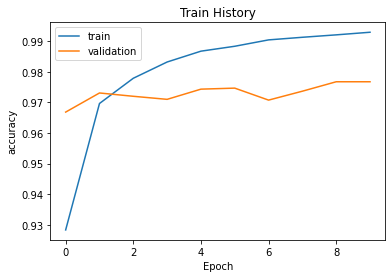

In [23]:
show_train_history(train_history,'accuracy','val_accuracy')

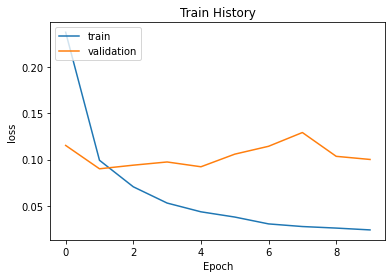

In [24]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [ ]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])